# TASK 1
### Predict the percentage of a student based on the number of hours of study.

Based on the problem statement we can conclude that it is a prediction problem. So it comes under the category of Supervised Machine Learning, where we have labeled data. In supervied ML we have many algorithms, but the algorithm which we can use for this problem can be decided, based on Exploratory data Analysis(EDA) and Data Visualation.

#### Steps invloved in building a Machine Learning model

### Step1: Collect data:
Here, we use the data that is provided in Tasks List of our program.Since this data is in form of a csv file, we use pandas library of python to read the data and store it in a data frame.

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataframe = pd.read_csv("http://bit.ly/w-data")
dataframe

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Here, we observe that the data provided has only two variables namely Hours, Scores where Hours is input variable and Scores is the output variable.

In [3]:
dataframe.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Step2: Prepare the data.
Here we use techniques like,
<br>
1 Preprocess Data
<br>
2 Transform Data

By pre-processing data we mean that, we check for inappropriate data values and inconsistent values such as NaN or empty values that are present in data. If present we transform the data, and fill these values using some techniques. We can fill these values by considering mean of these values or simply remove the tuple which has most inappropriate values but in this way we may miss hidden insights which that tuple may give.

In [4]:
len(dataframe.columns)

2

In [5]:
dataframe.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
pd.isnull(dataframe['Hours'])

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
Name: Hours, dtype: bool

In [7]:
pd.isnull(dataframe['Scores']).sum()

0

We observe that there are no null values in the data we have.

### Step3: Choosing the model
In machine learning we have various models. To know which model is best suited for our problem we need to explore the data by visualizing it and drawing conclusions. This process is called Exploratory data Analysis. It is one of the most important steps in finding the solution.

In [8]:
dataframe.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Here observe that when scores obtained by students is directly proportional to number of hours studied. We can conclude that by observing min,max and mean of the two variables present.Since we need to predict the score of students, we use supervised learning algorithms under prediction. These include algorithms like Regression. There are various kinds of regression techniques like linear regression,logistic regression, quanto regression, ridge regression etc. logistic regression can also be used for classification. 

In [9]:
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
#from sklearn.utils import shuffle

For further clarification we visualize the data using various graphs. Scatterplot is a special type of graph, usually designed to show the relationship between two variables.It can be used to visualize data points. 

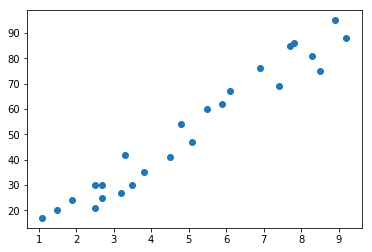

In [10]:
plt.scatter(x = dataframe['Hours'], y = dataframe['Scores'])
plt.show()

Here we see that, there exists a linear relationship between the two variables we used.

Box Plot is another graph that can be used mainly to detect outliers present in the data. It can also be used to know the mean, 25th, 50th, 75th percentiles.

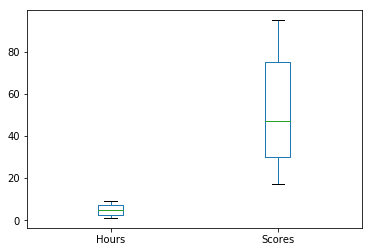

In [11]:
dataframe.plot(kind = 'box')
plt.show()

Here we observe that there are no outliers.So, Linear regression can be applied.

### Step4: Build and train the model

We use Sklearn package to build the linear regression model.So for that we two different pandas series so that it will be easy futher.

In [12]:
hours = pd.DataFrame(dataframe['Hours'])
scores = pd.DataFrame(dataframe['Scores'])

We split the data each variable into two parts for training and testing the data using train_test_split method of sklearn.model_selection package. Here we can split the data as our wish but it is split the data in a such a way that we have more number of tuples for training than testing.

In [13]:
hours_train, hours_test, scores_train, scores_test = sklearn.model_selection.train_test_split(hours, scores, test_size = 0.2)

In [14]:
lm = linear_model.LinearRegression()

In [15]:
model_built = lm.fit(hours_train,scores_train)

In [16]:
model_built

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Step5: Evaluation

For evaluation, we predict the values i.e scores_test using hours_test data and compare them. We can also measure the error using sklearn.metrics.

In [17]:
predictions = model_built.predict(hours_test)

In [18]:
type(predictions)

numpy.ndarray

In [19]:
import numpy as np
np.shape(predictions)

(5, 1)

In [20]:
predictions

array([[52.12770222],
       [69.60281805],
       [49.21518292],
       [21.06082963],
       [28.82754778]])

These are the values that are predicted by the mode_built linear regression model.

In [21]:
scores_test

,Scores
1,47
23,76
21,54
17,24
9,25


R2 score is defined as the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It lies between 0 and 1. If R2 score is equal is 1 that means the two variables are perfectly correlated to each other.

In [22]:
from sklearn.metrics import r2_score

In [23]:
r2_score(scores_test, predictions)

0.9398979298534672

Here, we got 0.93 which is a pretty high value. So, we can say that the two variables are highly correlated to each other.

We can use another metrics also for measuring how good the model known as mean squared error and mean absolution error. We can calculate these values easily as they are methods of sklearn.metrics package.<br>
<b>Mean squared error</b> (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
mean_squared_error(scores_test, predictions)

22.680117190495615

In [26]:
from sklearn.metrics import mean_absolute_error

In [27]:
mean_absolute_error(scores_test, predictions)

4.615283880352555

In [28]:
scores_all_predictions = model_built.predict(hours)

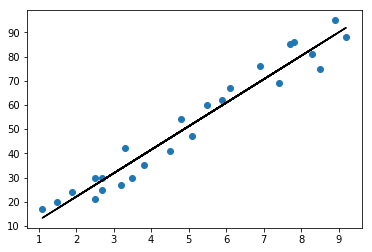

In [29]:
plt.scatter(hours, scores)
plt.plot(hours, scores_all_predictions, color = 'black')
plt.show()

### Question
What will be predicted score if a student studies for 9.25 hrs/ day?

In [30]:
model_built.predict([[9.25]])

array([[92.4175526]])

For input 9.25, we got output 92.417 approximately equal to 92.4 i.e if a student studies for 9.25 hours, he/she is likely to get 92.4 as score.

### Since we got high R2 score and less mean squared and mean absolute errors we can say that this model is a pretty good model.